In [68]:
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd
import math

## Varying the starting score

Currently the score is 1 to x with 4 minutes left in the game. Probabilities based on NHL stats.

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/2116831905.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


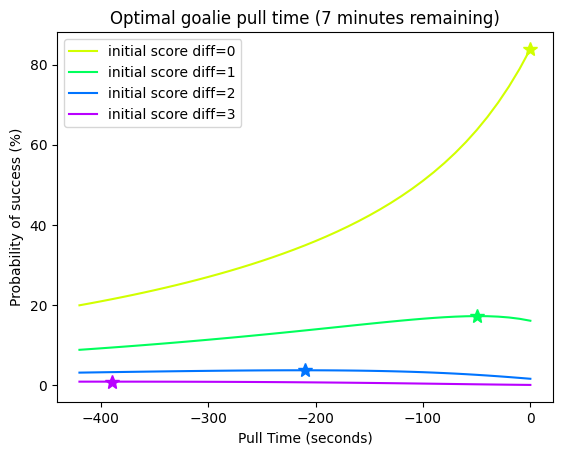

In [58]:
min_left = 7

decisions_df_1 = pkl.load(
    open(
        f"results/{min_left}minleft_1to1.pkl",
        "rb",
    )
)
decisions_df_1["init_diff"] = 0

decisions_df_2 = pkl.load(
    open(
        f"results/{min_left}minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_2["init_diff"] = 1

decisions_df_3 = pkl.load(
    open(
        f"results/{min_left}minleft_1to3.pkl",
        "rb",
    )
)
decisions_df_3["init_diff"] = 2

decisions_df_4 = pkl.load(
    open(
        f"results/{min_left}minleft_1to4.pkl",
        "rb",
    )
)
decisions_df_4["init_diff"] = 3


decisions_df = pd.concat(
    [
        decisions_df_1,
        decisions_df_2,
        decisions_df_3,
        decisions_df_4,
    ],
    ignore_index=True,
)

# Make the time that the game ends 0
decisions_df["pull_time"] = (
    decisions_df["pull_time"] - min_left * 60
)

options = decisions_df["init_diff"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(options))
color_map = dict(zip(options, palette))


for chosen_option in options:
    decisions_df_mins_left = decisions_df[decisions_df["init_diff"] == chosen_option]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"initial score diff={chosen_option}",
        color=color_map[chosen_option],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[chosen_option]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(f"Optimal goalie pull time ({min_left} minutes remaining)")
plt.legend()

## Varying number of minutes left in the game.

Down 2-1. Various number of minutes left in the game. Uses NHL stats-based probabilities

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/3104268839.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


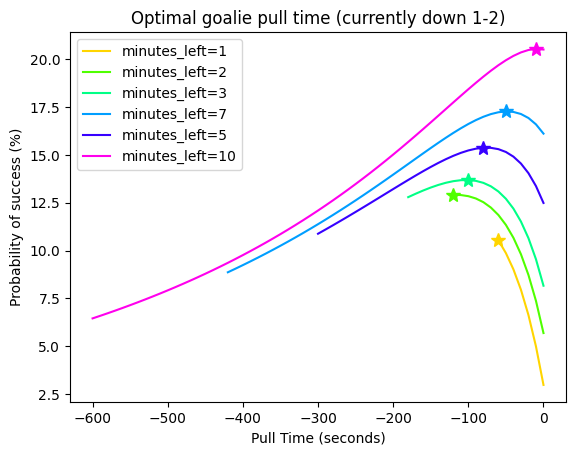

In [78]:
decisions_df_1 = pkl.load(
    open(
        "results/1minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_1["minutes_left"] = 1

decisions_df_2 = pkl.load(
    open(
        "results/2minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_2["minutes_left"] = 2

decisions_df_3 = pkl.load(
    open(
        "results/3minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_3["minutes_left"] = 3

decisions_df_5 = pkl.load(
    open(
        "results/5minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_5["minutes_left"] = 5

decisions_df_7 = pkl.load(
    open(
        "results/7minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_7["minutes_left"] = 7


decisions_df_10 = pkl.load(
    open(
        "results/10minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_10["minutes_left"] = 10

decisions_df = pd.concat([decisions_df_1, decisions_df_2, decisions_df_3, decisions_df_7, decisions_df_5, decisions_df_10], ignore_index=True)

# Make the time that the game ends 0
decisions_df["pull_time"] = (
    decisions_df["pull_time"] - decisions_df["minutes_left"] * 60
)

options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(options))
color_map = dict(zip(options, palette))


for chosen_option in options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == chosen_option]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={chosen_option}",
        color=color_map[chosen_option],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[chosen_option]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "Optimal goalie pull time (currently down 1-2)"
)
plt.legend()

## Earliest time you should pull the goalie if you are down 1-2

Based on the plot above, we know this is between 2 and 3 minutes. Turns out to be exactly at 2 minutes.

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/579091030.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


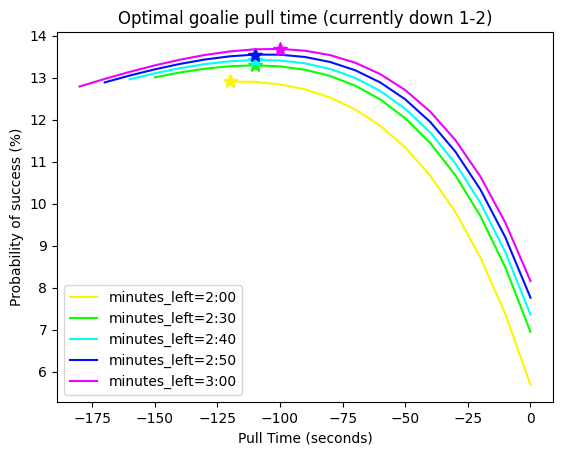

In [81]:
seconds_left_values = [2 * 60, 2 * 60 + 30, 2 * 60 + 40, 2 * 60 + 50, 3 * 60]

decisions_df = pd.DataFrame()

# Load the data for each option for amount of time left
for seconds_left in seconds_left_values:
    if int(seconds_left % 60) == 0:
        formatted_time_left = f"{int(seconds_left / 60)}"
    else:
        formatted_time_left = (
            f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
        )
    cur_decisions_df = pkl.load(
        open(
            f"results/{formatted_time_left}minleft_1to2.pkl",
            "rb",
        )
    )
    cur_decisions_df["minutes_left"] = (
        f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
    )
    cur_decisions_df["seconds_left"] = seconds_left

    decisions_df = pd.concat([decisions_df, cur_decisions_df], ignore_index=True)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - decisions_df["seconds_left"]

options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(options))
color_map = dict(zip(options, palette))


for chosen_option in options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == chosen_option]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={chosen_option}",
        color=color_map[chosen_option],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[chosen_option]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Optimal goalie pull time (currently down 1-2)")
plt.legend()

## Earliest time you should pull the goalie if you are down 1-3

Turns out this is 4:30 left in the game

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/1307837328.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


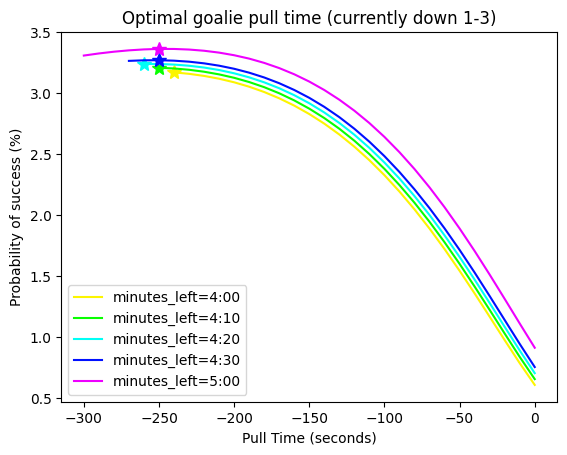

In [73]:
seconds_left_values = [4 * 60, 4 * 60 + 10, 4 * 60 + 20, 4 * 60 + 30, 5 * 60]

decisions_df = pd.DataFrame()

# Load the data for each option for amount of time left
for seconds_left in seconds_left_values:
    if int(seconds_left % 60) == 0:
        formatted_time_left = f"{int(seconds_left / 60)}"
    else:
        formatted_time_left = (
            f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
        )
    cur_decisions_df = pkl.load(
        open(
            f"results/{formatted_time_left}minleft_1to3.pkl",
            "rb",
        )
    )
    cur_decisions_df["minutes_left"] = (
        f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
    )
    cur_decisions_df["seconds_left"] = seconds_left

    decisions_df = pd.concat([decisions_df, cur_decisions_df], ignore_index=True)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - decisions_df["seconds_left"]

options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(options))
color_map = dict(zip(options, palette))


for chosen_option in options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == chosen_option]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={chosen_option}",
        color=color_map[chosen_option],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[chosen_option]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Optimal goalie pull time (currently down 1-3)")
plt.legend()

## Earliest time you should pull the goalie if you are down 1-4

Turns out this is at 6:40 left in the game

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/1963101072.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


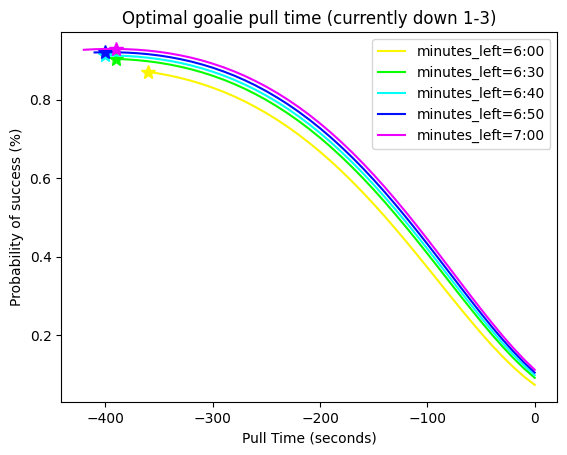

In [84]:
seconds_left_values = [6 * 60, 6 * 60 + 30, 6 * 60 + 40, 6 * 60 + 50, 7 * 60]

decisions_df = pd.DataFrame()

# Load the data for each option for amount of time left
for seconds_left in seconds_left_values:
    if int(seconds_left % 60) == 0:
        formatted_time_left = f"{int(seconds_left / 60)}"
    else:
        formatted_time_left = (
            f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
        )
    cur_decisions_df = pkl.load(
        open(
            f"results/{formatted_time_left}minleft_1to4.pkl",
            "rb",
        )
    )
    cur_decisions_df["minutes_left"] = (
        f"{math.floor(seconds_left / 60)}:{int(seconds_left % 60):02}"
    )
    cur_decisions_df["seconds_left"] = seconds_left

    decisions_df = pd.concat([decisions_df, cur_decisions_df], ignore_index=True)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - decisions_df["seconds_left"]

options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(options))
color_map = dict(zip(options, palette))


for chosen_option in options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == chosen_option]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={chosen_option}",
        color=color_map[chosen_option],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[chosen_option]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Optimal goalie pull time (currently down 1-3)")
plt.legend()